# UCI Heart Disease Data

**This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis.**

**One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not**

**It is composed of 14 attributes**



#### Column Descriptions:

* id (Unique id for each patient)

* age (Age of the patient in years)

* origin (place of study)

* sex (Male/Female)

* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

* chol (serum cholesterol in mg/dl)

* fbs (if fasting blood sugar > 120 mg/dl)

* restecg (resting electrocardiographic results)

* -- Values: [normal, stt abnormality, lv hypertrophy]

* thalach: maximum heart rate achieved

* exang: exercise-induced angina (True/ False)

* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment

* ca: number of major vessels (0-3) colored by fluoroscopy

* thal: [normal; fixed defect; reversible defect]

* num: the predicted attribute

## Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the csv data to a Pandas DataFrame

df = pd.read_csv('heart_disease_data.csv')

In [5]:
# print first 5 rows of the dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [7]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking if the dataset contains any missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the dataset

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of Target Variable

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

# Distributions and relationship.

## a) target variable distribution

1    165
0    138
Name: target, dtype: int64


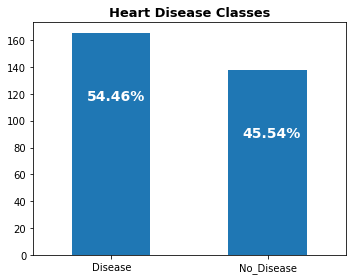

In [25]:
print(df.target.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

#### There are more diseased than healthy patients.

## b) Age variable distribution

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64


Text(0.5, 1.0, 'Age Distribution')

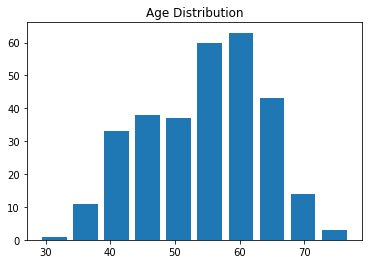

In [33]:
print(df.age.value_counts())
plt.hist(df['age'], histtype='bar', rwidth=0.8)
 
plt.title("Age Distribution")

#### The age are normally distributed.

## correlation

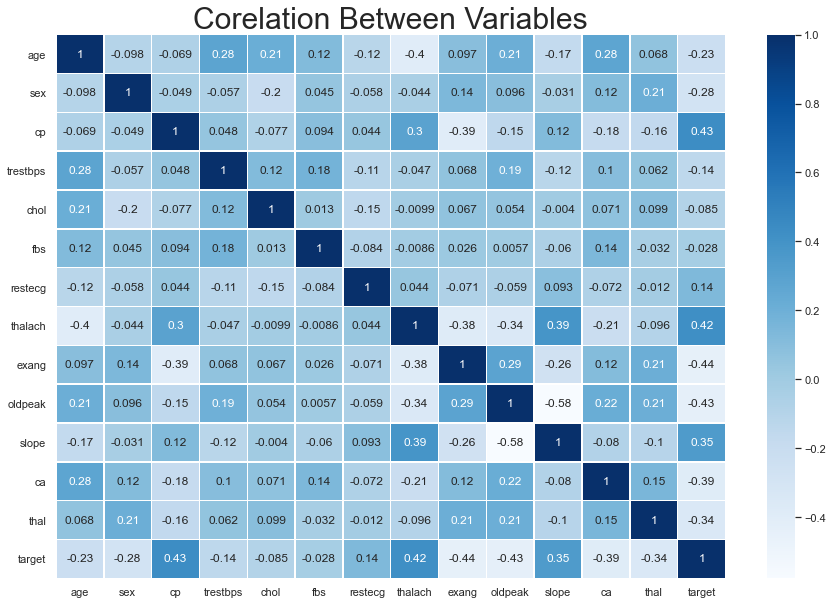

In [40]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

* ‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target

* ‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target

* ‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target

### Splitting the Features and Target Variables

In [12]:
X = df.drop(columns='target', axis=1)
Y = df['target']

### Splitting the Data into Test & Training Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training

### Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation

##### Accuracy Score

In [18]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [20]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


## Building a Predictive System

In [22]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


F:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
